In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import operator
import warnings
import time
import matplotlib.pyplot as plt


# Events - Looking at Datasets 

In [3]:
events = pd.read_csv('events.csv')
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
# We need to separate date and timestamp in events file

In [39]:
times1=[]
for i in events['timestamp']:
    times1.append(datetime.datetime.fromtimestamp(i//1000.0))

In [40]:
events['timestamp'] = times1

In [41]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 10:32:12,257597,view,355908,NaN
1,2015-06-02 11:20:14,992329,view,248676,NaN
2,2015-06-02 10:43:19,111016,view,318965,NaN
3,2015-06-02 10:42:35,483717,view,253185,NaN
4,2015-06-02 10:32:17,951259,view,367447,NaN


## Heatmaps

,timestamp,visitorid,itemid,transactionid
timestamp,1.000000,0.005997,0.001093,-0.001315
visitorid,0.005997,1.000000,0.000259,-0.010098
itemid,0.001093,0.000259,1.000000,-0.004543
transactionid,-0.001315,-0.010098,-0.004543,1.000000


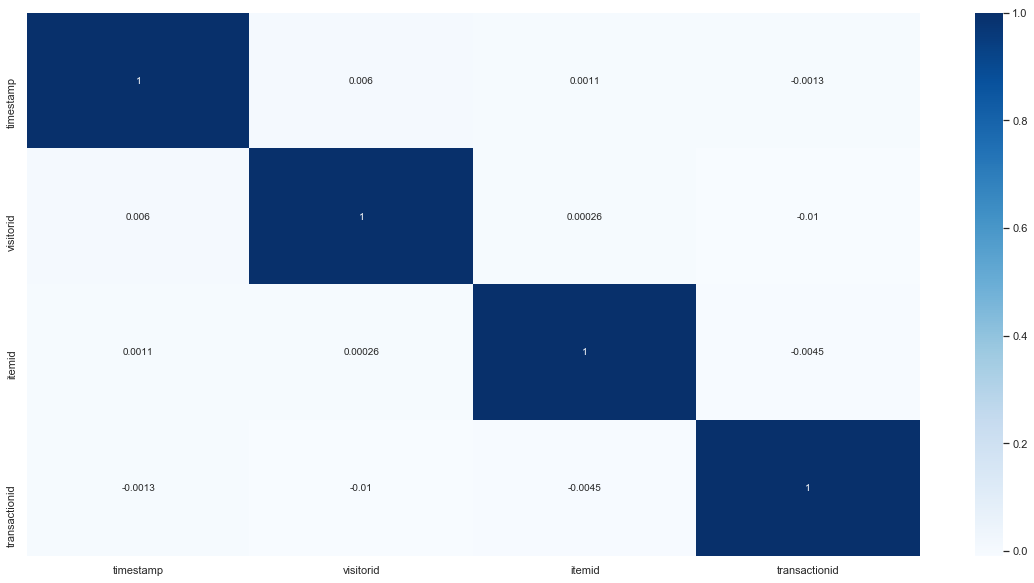

In [18]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= events.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c

## Dataset Statistics 

In [21]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [23]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
timestamp        int64
visitorid        int64
event            object
itemid           int64
transactionid    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


## Summary

In [42]:
#We can see that total no of visitors:2756101
events.shape

(2756101, 5)

### Unique Visitors are almost half the number of Total Visitors


In [36]:
visitors=events["visitorid"].unique()
print('Visitor count on actions:',events["visitorid"].shape[0])
print('Total unique visitors :',visitors.shape[0])

Visitor count on actions: 2756101
Total unique visitors : 1407580


### Types of actions performed by the user when visiting the website 

In [34]:
events["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [35]:
print(events["event"].value_counts())

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64


In [28]:
print(events["transactionid"].dropna().unique().shape[0])

17672


### No of items 

In [30]:
print(events["itemid"].unique().shape[0])

235061


### Pie Chart: view v/s addtocart v/s transaction 

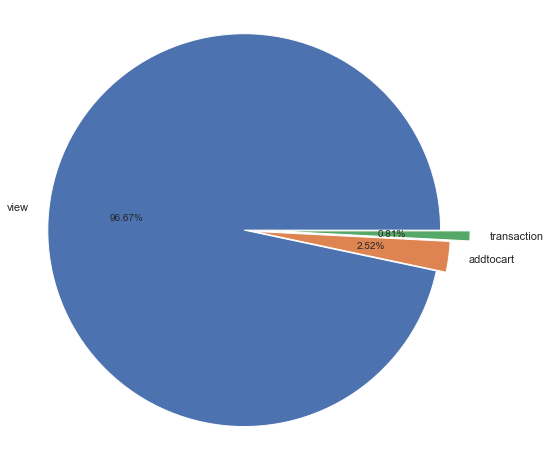

In [41]:
data = events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.05, 0.15)
fig, ax = plt.subplots(figsize=(8,8))

patches, texts, autotexts = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=False, startangle=0) 

ax.axis('equal')
plt.show()

In [ ]:
grouped=events.groupby('event')['itemid'].apply(list)

In [43]:
print(grouped)

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object


### Barplot: The most view itemid - 187946

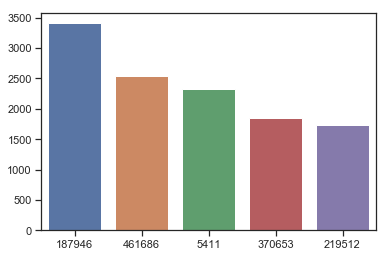

In [48]:
views=grouped['view']
count_view={}
#for item in set(views[:]):
    #print(item)
#    count_view[item]=views.count(item)
views=np.array(views[:])

unique, counts = np.unique(views, return_counts=True)
count_view=dict(zip(unique, counts))
sorted_count_view =sorted(count_view.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_view[:5]]
y=[i[1] for i in sorted_count_view[:5]]
sns.barplot(x,y,order=x)

### Barplot: The most addtocart itemid - 461686

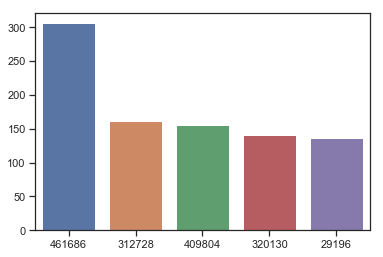

In [49]:
addtocart=grouped['addtocart']
count_addtocart={}
# for item in set(addtocart[:]):
#     #print(item)
#     count_addtocart[item]=addtocart.count(item)
addtocart=np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart=dict(zip(unique, counts))

sorted_count_addtocart =sorted(count_addtocart.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_addtocart[:5]]
y=[i[1] for i in sorted_count_addtocart[:5]]
g=sns.barplot(x,y, order=x)

### Barplot: The most transaction itemid - 461686

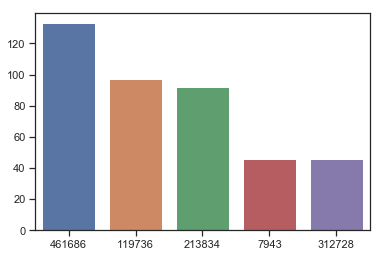

In [50]:
transaction=grouped['transaction']
count_transaction={}
# for item in set(transaction[]):
#     #print(item)
#     count_transaction[item]=transaction.count(item)
transaction=np.array(transaction[:])
unique, counts = np.unique(transaction, return_counts=True)
count_transaction=dict(zip(unique, counts))

sorted_count_transaction =sorted(count_transaction.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_transaction[:5]]
y=[i[1] for i in sorted_count_transaction[:5]]
g=sns.barplot(x,y, order=x)

### Histogram: No of visitors appeared 

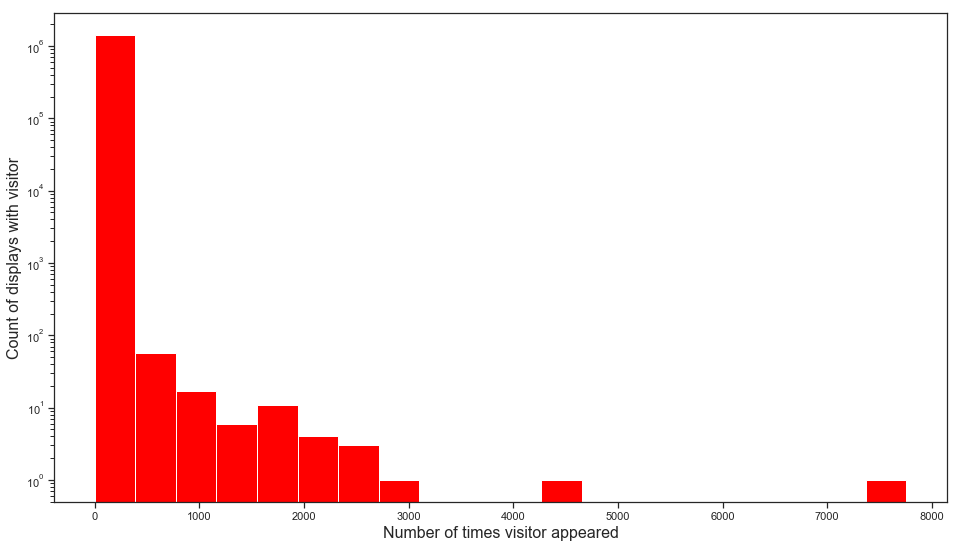

In [51]:
items = events.visitorid.value_counts()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=20, log=True,color='red')
plt.xlabel('Number of times visitor appeared', fontsize=16)
plt.ylabel('Count of displays with visitor', fontsize=16)
plt.show()

# Items - Looking at Dataset

In [2]:
#Combine items dataset
items1 = pd.read_csv('item_properties_part1.csv')
items2 = pd.read_csv('item_properties_part2.csv')

In [3]:
items=pd.concat([items1,items2])

In [5]:
items.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


## We need to separate date and timestamp in items file

In [6]:
import datetime
times=[]
for i in items['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0))

In [7]:
items['timestamp']=times

In [8]:
items.head()

,timestamp,itemid,property,value
0,2015-06-28 08:30:00,460429,categoryid,1338
1,2015-09-06 08:30:00,206783,888,1116713 960601 n277.200
2,2015-08-09 08:30:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 08:30:00,59481,790,n15360.000
4,2015-05-17 08:30:00,156781,917,828513


In [9]:
#This gives us no of rows, cols
items.shape

(20275902, 4)

## Check Missing Values if any

In [14]:
#No missing value
items.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

## Dataset Statisrics



In [46]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
timestamp    datetime64[ns]
itemid       int64
property     object
value        object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 773.5+ MB


In [47]:
items.describe(include=np.object)

,property,value
count,20275902,20275902
unique,1104,1966868
top,888,769062
freq,3000398,1537247


In [48]:
items["property"].value_counts()

888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
283            597419
776            574220
678            481966
364            476486
202            448938
839            417239
917            417227
159            417053
764            417053
112            417053
227            347492
698            289849
451            264416
663            240813
962            239372
400            216481
689            214225
28             172393
928            160818
1036           146246
810            142575
348            113303
544            113246
713            104931
1032            82805
               ...   
427                 5
872                 5
531                 5
556                 5
1088                4
598                 4
471                 4
883                 3
58                  3
703                 3
1018                2
494                 2
1027                2
968                 2
712       

In [14]:
items.nunique()

timestamp         18
itemid        417053
property        1104
value        1966868
dtype: int64

In [17]:
items['property'].nunique()

1104

# Category - Looking at Dataset

In [25]:
category = pd.read_csv('category_tree.csv')
category.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


## Dataset Statistics

In [19]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
categoryid    1669 non-null int64
parentid      1644 non-null float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [23]:
category.describe()

,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000


## Check Missing values

In [24]:
category.isnull().sum()

categoryid     0
parentid      25
dtype: int64

In [26]:
#Dropping missing values

In [27]:
category = category.dropna(axis=0)

In [28]:
category.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0
10,83,1621.0


## Convert float to int

In [ ]:
#Also we can see that 'parentid' is in float, convert to integer

In [35]:
print(type(category.parentid[0]))

<class 'numpy.float64'>


In [36]:
category.parentid = category.parentid.astype('int64') 

In [37]:
category.head(10)

,categoryid,parentid
0,1016,213
1,809,169
2,570,9
3,1691,885
4,536,1691
6,542,378
7,1146,542
8,1140,542
9,1479,1537
10,83,1621
